In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot

pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
train = pd.read_csv(r'dataset\train.csv')
test = pd.read_csv(r'dataset\test.csv')

In [3]:
print(train.info())
print('-'*100)
print(train.describe())
print('-'*100)
print("The shape of the data is : ", train.shape)
print('-'*100)
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB
None
-------------------------

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [4]:
print(test.info())
print('-'*100)
print(test.describe())
print('-'*100)
print("The shape of the data is : ", test.shape)
print('-'*100)
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3429 non-null   float64
 2   instock_date      3430 non-null   object 
 3   Market_Category   3430 non-null   int64  
 4   Customer_name     3377 non-null   object 
 5   Loyalty_customer  3430 non-null   object 
 6   Product_Category  3430 non-null   object 
 7   Grade             3430 non-null   int64  
 8   Demand            3430 non-null   int64  
 9   Discount_avail    3430 non-null   int64  
 10  charges_1         3394 non-null   float64
 11  charges_2 (%)     3425 non-null   float64
 12  Minimum_price     3416 non-null   float64
 13  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 375.3+ KB
None
------------------------------------------------------------------------

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [60]:
df = train.copy()
df_test = test.copy()

In [61]:
df = df.dropna(subset=['Selling_Price'])

In [62]:
df = df[df['Selling_Price']>0]

In [63]:
df.shape

(6313, 15)

In [64]:
df.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       206
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price        38
Maximum_price       340
Selling_Price         0
dtype: int64

In [65]:
df['Discount_avail'].unique()

array([ 0.,  1., nan])

In [66]:
df['Discount_avail'] = df['Discount_avail'].fillna(df['Discount_avail'].mode()[0])

df['Stall_no'] = df['Stall_no'].fillna(df['Stall_no'].mode()[0])
df_test['Stall_no'] = df_test['Stall_no'].fillna(df_test['Stall_no'].mode()[0])

df['charges_1'] = df['charges_1'].fillna(df['charges_1'].median())
df['charges_2 (%)'] = df['charges_2 (%)'].fillna(df['charges_2 (%)'].median())
df['Minimum_price'] = df['Minimum_price'].fillna(df['Minimum_price'].median())
df['Maximum_price'] = df['Maximum_price'].fillna(df['Maximum_price'].median())

df_test['charges_1'] = df_test['charges_1'].fillna(df_test['charges_1'].median())
df_test['charges_2 (%)'] = df_test['charges_2 (%)'].fillna(df_test['charges_2 (%)'].median())
df_test['Minimum_price'] = df_test['Minimum_price'].fillna(df_test['Minimum_price'].median())

In [67]:
df['Stall_no'].unique().shape

(50,)

In [68]:
df.isnull().sum()

Product_id            0
Stall_no              0
instock_date          0
Market_Category       0
Customer_name       206
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail        0
charges_1             0
charges_2 (%)         0
Minimum_price         0
Maximum_price         0
Selling_Price         0
dtype: int64

In [69]:
df_test.isnull().sum()

Product_id           0
Stall_no             0
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1            0
charges_2 (%)        0
Minimum_price        0
Maximum_price        0
dtype: int64

In [70]:
df = df.drop(['Product_id', 'Customer_name'], axis=1)
df_test = df_test.drop(['Product_id', 'Customer_name'], axis=1)

In [71]:
df = df.drop(['instock_date'], axis=1)
df_test = df_test.drop(['instock_date'], axis=1)

In [72]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df['Loyalty_customer'] = lb.fit_transform(df['Loyalty_customer'])
df_test['Loyalty_customer'] = lb.transform(df_test['Loyalty_customer'])

df['Product_Category'] = lb.fit_transform(df['Product_Category'])
df_test['Product_Category'] = lb.transform(df_test['Product_Category'])

In [73]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

test_X = df_test.copy()
print(X.shape, y.shape, test_X.shape)

(6313, 11) (6313,) (3430, 11)


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5050, 11) (5050,) (1263, 11) (1263,)


In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train, y_train)

In [16]:
print(model.coef_)

[ 1.92841018e-01  4.60147965e-02 -4.70193254e+01  4.09111241e-02
  7.13529329e+01 -2.35938808e-01 -4.43470831e+03  1.02158860e+00
 -1.34503106e+00  5.05332403e-01  3.96592185e-01]


In [17]:
print(model.intercept_)

582.98580139765


In [76]:
y_pred = model.predict(X_test)
print(y_pred)

[3733.2969795  5366.73907577 5785.46932201 ... 4475.48449786 2848.40633409
 2791.36599124]


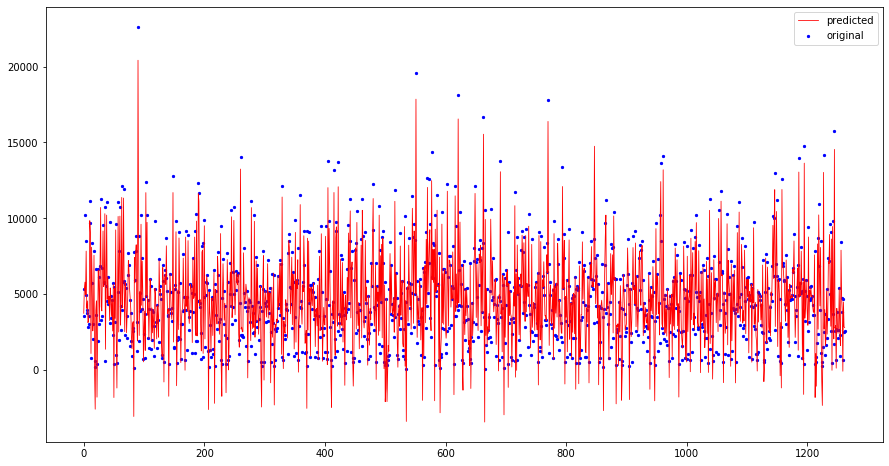

In [77]:
plt.figure(figsize=(15,8))
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9203458003373564


In [79]:
y_train_pred = model.predict(X_train)
print(y_train_pred)

[3287.70943632 5920.57496839 3264.01857104 ... 4697.95406119   37.6303359
 4564.19823172]


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Squared Error:', mean_squared_error(y_train, y_train_pred)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_train, y_train_pred))

Mean Squared Error: 815487.2456898367
Root Mean Squared Error: 903.0433243703409
Mean Absolute Error: 484.5296723553514


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 767798.9576825479
Root Mean Squared Error: 876.2413809462253
Mean Absolute Error: 492.6617970137602


In [24]:
from sklearn.ensemble import RandomForestRegressor

## Random Forest Regressor

In [82]:
model = RandomForestRegressor(n_estimators= 1)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [83]:
predictions = model.predict(X_test)

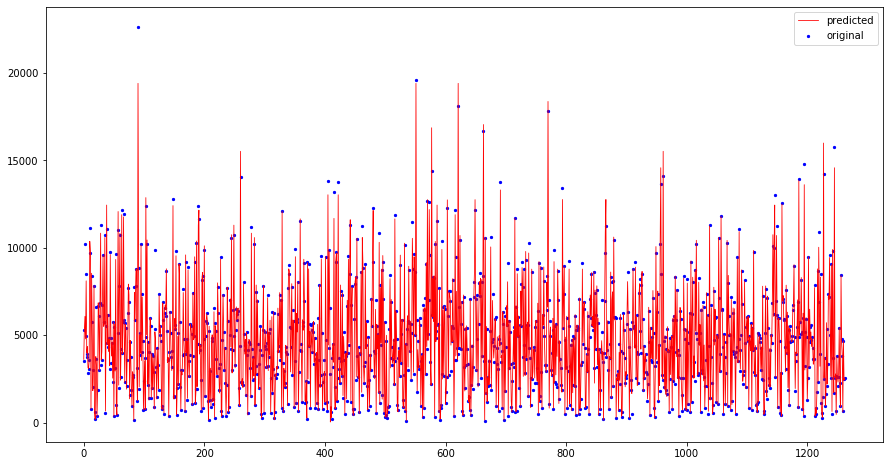

In [84]:
plt.figure(figsize=(15,8))
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, predictions, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Squared Error:', mean_squared_error(y_test, predictions)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))

Mean Squared Error: 163124.6450138038
Root Mean Squared Error: 403.8869210729704
Mean Absolute Error: 188.83194390961995


## XGB

In [86]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train, verbose=False)

[15:12:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [32]:
from sklearn.metrics import mean_squared_error
y_train_predicted = xgb_reg.predict(X_train)
mse = mean_squared_error(y_train_predicted, y_train)
rmse = np.sqrt(mse)
rmse 

480.3703514093406

In [87]:
y_test_pred = xgb_reg.predict(X_test)

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))

Mean Squared Error: 127511.51548722634
Root Mean Squared Error: 357.0875459704893
Mean Absolute Error: 160.4716139434998


In [56]:
test_X = pd.DataFrame(pt.transform(test_X))
test_X = pd.DataFrame(sc.transform(test_X))

In [89]:
y_real = xgb_reg.predict(test_X)

In [90]:
output = pd.DataFrame({'Product_id': test.Product_id, 'Selling_Price': y_real})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [95]:
output.iloc[1,1]

1914.1075

In [96]:
for i in range(3430):
    if output.iloc[i,1]<0:
        output.iloc[i,1] = -output.iloc[i,1]

In [97]:
output['Selling_Price'][output['Selling_Price']<0]

Series([], Name: Selling_Price, dtype: float32)

In [98]:
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
